In [9]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos
from scipy.integrate import ode

In [10]:
ida = []  #Gráfica de ida
vuelta = []  #Gráfica de vuelta
V1 = []
V2 = []

#Establecemos el número de puntos donde evaluaremos la función diferencial
pts = 100

#Definimos nuestra ecuación diferencial
def f(t, z, p):
    #----------------------------------------------
    # Lado derecho de las ecuaciones diferenciales
    #  dx/dt = y
    #  dy/dt = - δ*y - α*dx - β*x**3 + γ*cos(ω*t)
    #----------------------------------------------
        
    δ, α, β, γ, ω = p                           #Parámetros de nuestra integral
    x, y = z                                    #Parámetros de integración
    f = [y, - δ*y - α*x - β*x**3 + γ*cos(ω*t)]  #Función a integrar
    
    return f

#Creamos una instancia para resolver la ecuación diferencial a través del método 'dopri5'
solver = ode(f)
solver.set_integrator('dopri5')

#Especificamos los parámetros de la ecuación a nuestra función
γ = 1.0
α = 1.0
β = 0.01
δ = 0.1
omega = np.linspace(0, 2.5, pts)

t0 = 0.0
z0 = [1.0, 0.0] 
z = 0
for i in range(0,pts):
     
    ω = omega[i]
    val = δ, α, β, γ, ω                      
    solver.set_f_params(val)
    
    # Fijamos el valor inical z(0) = z0
    solver.set_initial_value(z0, t0)
    
     #Creamos un arreglo de valores de tiempo t para los cuales evalue la solución; creamos también un arreglo que 
    #almacene los valores obtenidos
    t1 = 20
    n = 400
    t = np.linspace(t0, t1, n)
    sol = np.empty((n, 2))
    sol[0] = z0
    
     #Llamamos repetidamente al integrador para que avance en la solución un tiempo 'k'
    k = 1
    
    while solver.successful() and solver.t < t1:
        solver.integrate(t[k])
        sol[k] = solver.y
        k += 1
        
    x1 = sol[:,0]
    y1 = sol[:,1]
                
    #Actualizamos las condiciones iniciales
    t0 = 0.0
    z0 = [max(x1),0]
    V1.append(ω)
    ida.append(z0[0])
    
t0 = 0.0
z0 = [1.0,0.0]

for j in range(0,pts):
    
    if omega[-j]==0.0:
        ω = 2.5
        val = δ, α, β, γ, ω                      
        solver.set_f_params(val)
    else:
        ω = omega[-j]
        val = δ, α, β, γ, ω                      
        solver.set_f_params(val)
        
         # Al ser la gráfica de vuelta, las condiciones iniciales serán las que eran en la última iteración de la ida
    solver.set_initial_value(z0, t0)
    
    #Creamos un arreglo de valores de tiempo t para los cuales evalue la solución; creamos también un arreglo que 
    #almacene los valores obtenidos
    t1 = 20
    n = 400
    t = np.linspace(t0, t1, n)
    sol = np.empty((n, 2))
    sol[0] = z0
    
    #Llamamos repetidamente al integrador para que avance en la solución un tiempo 'k'
    k = 1
    
    while solver.successful() and solver.t < t1:
        solver.integrate(t[k])
        sol[k] = solver.y
        k += 1
        
    x2 = sol[:,0]
    y2 = sol[:,1]
    
    #Actualizamos las condiciones iniciales
    t0 = 0.0
    z0 = [max(x2),0]
    V2.append(ω)
    vuelta.append(z0[0])
    
    
     

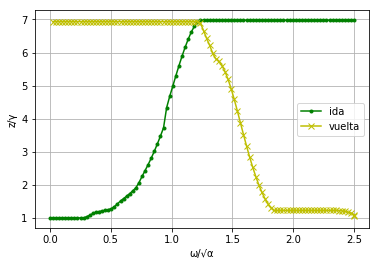

In [11]:
# Graficamos la solución

plt.plot(V1, ida, label='ida',marker='.',color='g')
plt.plot(V2, vuelta, label='vuelta',marker='x',color='y')
plt.xlabel('ω/√α')
plt.ylabel('z/γ')
plt.grid(True)
plt.legend()
plt.savefig('ec_duffing1.jpg', plt=2000)
plt.show()
